## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df = pd.merge(mouse_metadata,study_results,on="Mouse ID")

# Display the data table for preview
df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
total_mice=len(df["Mouse ID"])
total_mice

1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_duplicates=df.loc[df.duplicated(subset=['Mouse ID','Timepoint'])]
mouse_duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID
# mouse_clean = (df["Mouse ID"]).unique()
# mouse_clean_df
# timepoint_clean=(df["Timepoint"]).unique()



In [5]:
clean_df = df.drop_duplicates(subset=["Mouse ID","Timepoint"])
clean_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary Statistics

In [6]:
unique_regimen=clean_df["Drug Regimen"].unique()
unique_regimen

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [7]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
means = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std=clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem= clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
summary_df= pd.DataFrame({
    "Mean":means,
    "Median":median,
    "Variance":variance,
    "Standard Deviation":std,
    "SEM":sem})
summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_df = clean_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
summary_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

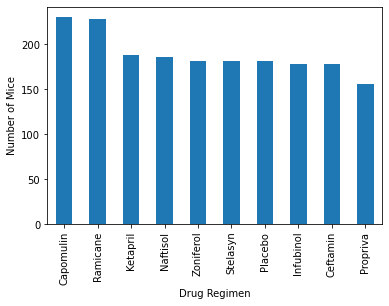

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     156
Name: Drug Regimen, dtype: int64

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_coun = clean_df['Drug Regimen'].value_counts()
drug_coun.plot.bar()
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.show()
drug_coun

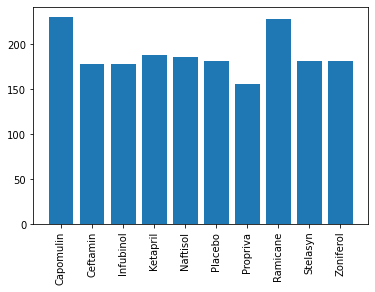

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
drug_counts = clean_df.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].count()
plt.bar(drug_counts.index.values, drug_counts.values)
plt.xticks(rotation=90)
plt.show()


Text(0.5, 0, 'Distribution Comparisons Gender')

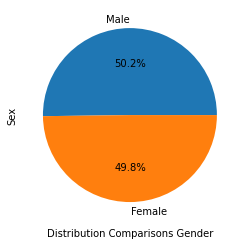

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
g_clean=clean_df.drop_duplicates(subset="Mouse ID")['Sex'].value_counts()
g_clean
g_clean.plot.pie(autopct='%1.1f%%')
plt.xlabel("Distribution Comparisons Gender")

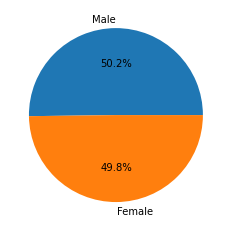

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gend_clean=clean_df.drop_duplicates(subset="Mouse ID")['Sex'].value_counts()
plt.pie(gend_clean.values,labels=gend_clean.index.values,autopct='%1.1f%%')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin



# Start by getting the last (greatest) timepoint for each mouse
gb_tumor=clean_df.groupby(["Mouse ID"]).max()
gb_tumor = gb_tumor.reset_index()
gb_tumor


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
new_df=gb_tumor[['Mouse ID','Timepoint']].merge(clean_df,on=['Mouse ID','Timepoint'],how="left")
new_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [14]:
# Put treatments into a list for for loop (and later for plot labels)

Regimens=[ "Capomulin", "Ramicane", "Infubinol" ,"Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for regimen in Regimens:
    
# Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = new_df.loc[new_df["Drug Regimen"] == regimen, 'Tumor Volume (mm3)']

# add subset 
    tumor_vol_list.append(final_tumor_vol)

# Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = round(lowerq - (1.5*iqr))
    upper_bound = round(upperq + (1.5*iqr))
    print(f"{regimen}'s the potential outliers are the following: {lower_bound} and {upper_bound}")
    print()
    
    

Capomulin's the potential outliers are the following: 21 and 52

Ramicane's the potential outliers are the following: 18 and 54

Infubinol's the potential outliers are the following: 37 and 83

Ceftamin's the potential outliers are the following: 25 and 88



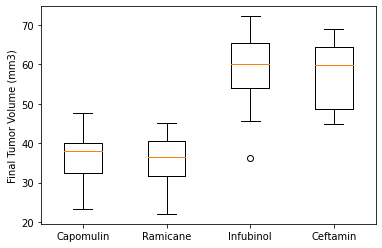

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_vol_list,labels=['Capomulin','Ramicane','Infubinol','Ceftamin'],)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()


## Line and Scatter Plots

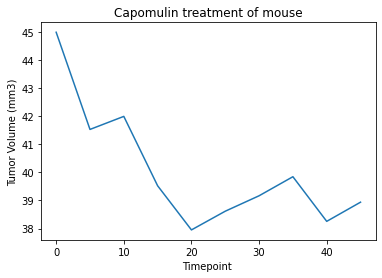

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_df = clean_df.loc[clean_df['Drug Regimen'] == "Capomulin"]
mousecap_df = capomulin_df.loc[capomulin_df['Mouse ID']== 'b742']
plt.plot(mousecap_df['Timepoint'], mousecap_df['Tumor Volume (mm3)'])
plt.xlabel('Timepoint ')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse')
plt.show()


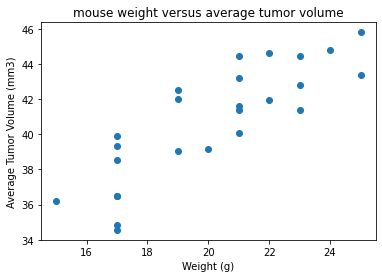

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cap_df = clean_df.loc[clean_df['Drug Regimen'] == "Capomulin"]
cap_avg_df = cap_df.groupby(['Mouse ID']).mean()
plt.scatter(cap_avg_df['Weight (g)'],cap_avg_df['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('mouse weight versus average tumor volume')
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


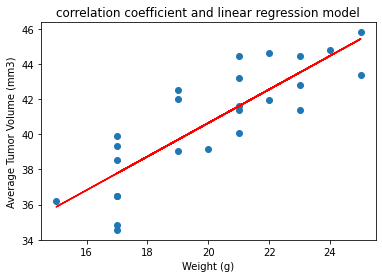

In [18]:
# Calculate the correlation coefficient and linear regression model 
cap_df = clean_df.loc[clean_df['Drug Regimen'] == "Capomulin"]
cap_avg_df = cap_df.groupby(['Mouse ID']).mean()

corr=round(st.pearsonr(cap_avg_df['Weight (g)'],cap_avg_df['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and the average tumor volume is {corr}")

model = st.linregress(cap_avg_df['Weight (g)'],cap_avg_df['Tumor Volume (mm3)'])
y_values = cap_avg_df['Weight (g)']*model[0]+model[1]

plt.scatter(cap_avg_df['Weight (g)'],cap_avg_df['Tumor Volume (mm3)'])
plt.plot(cap_avg_df['Weight (g)'],y_values,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('correlation coefficient and linear regression model')
plt.show()
